In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
data = pd.read_csv('Synthetic_Financial_datasets_log.csv')

In [27]:
data.head()

step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  
0  M1979787155             0.0             0.0        0  
1  M2044282225             0.0             0.0        0  
2   C553264065             0.0             0.0        1  
3    C38997010         21182.0             0.0        1  
4  M1230701703             0.0             0.0        0

In [29]:
data.isnull().sum

<bound method DataFrame.sum of           step   type  amount  nameOrig  oldbalanceOrg  newbalanceOrig  \
0        False  False   False     False          False           False   
1        False  False   False     False          False           False   
2        False  False   False     False          False           False   
3        False  False   False     False          False           False   
4        False  False   False     False          False           False   
...        ...    ...     ...       ...            ...             ...   
1048570  False  False   False     False          False           False   
1048571  False  False   False     False          False           False   
1048572  False  False   False     False          False           False   
1048573  False  False   False     False          False           False   
1048574  False  False   False     False          False           False   

         nameDest  oldbalanceDest  newbalanceDest  isFraud  
0           False  

In [30]:
data.describe()

step        amount  oldbalanceOrg  newbalanceOrig  \
count  1.048575e+06  1.048575e+06   1.048575e+06    1.048575e+06   
mean   2.696617e+01  1.586670e+05   8.740095e+05    8.938089e+05   
std    1.562325e+01  2.649409e+05   2.971751e+06    3.008271e+06   
min    1.000000e+00  1.000000e-01   0.000000e+00    0.000000e+00   
25%    1.500000e+01  1.214907e+04   0.000000e+00    0.000000e+00   
50%    2.000000e+01  7.634333e+04   1.600200e+04    0.000000e+00   
75%    3.900000e+01  2.137619e+05   1.366420e+05    1.746000e+05   
max    9.500000e+01  1.000000e+07   3.890000e+07    3.890000e+07   

       oldbalanceDest  newbalanceDest       isFraud  
count    1.048575e+06    1.048575e+06  1.048575e+06  
mean     9.781600e+05    1.114198e+06  1.089097e-03  
std      2.296780e+06    2.416593e+06  3.298351e-02  
min      0.000000e+00    0.000000e+00  0.000000e+00  
25%      0.000000e+00    0.000000e+00  0.000000e+00  
50%      1.263772e+05    2.182604e+05  0.000000e+00  
75%      9.159235e+05    1.149808e+06  0.000000e+00  
max      4.210000e+07    4.220000e+07  1.000000e+00

Text(0, 0.5, 'Frequency')

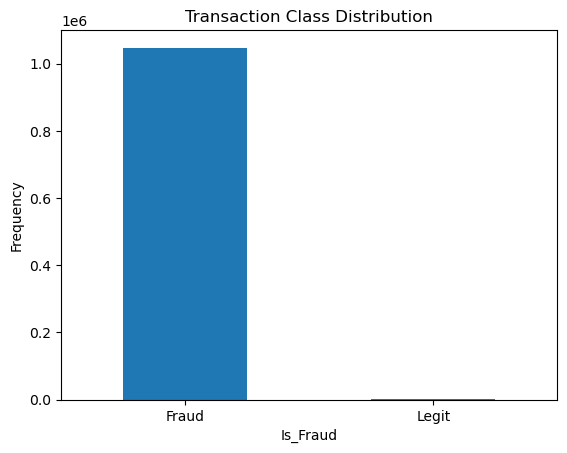

In [31]:
Fraud = data[data['isFraud']==1]
Legit = data[data['isFraud']==0]

count_isFraud = pd.Series(data['isFraud']).value_counts(sort = True)
count_isFraud.plot(kind = 'bar', rot =0)

plt.title("Transaction Class Distribution")
LABELS = ["Fraud", "Legit"]
plt.xticks(range(2), LABELS)

plt.xlabel("Is_Fraud")
plt.ylabel("Frequency")

In [36]:
print(data.type.value_counts())

type
CASH_OUT    373641
PAYMENT     353873
CASH_IN     227130
TRANSFER     86753
DEBIT         7178
Name: count, dtype: int64


In [39]:
#allows functions like px.scatter, px.line, px.bar, etc.) for creating interactive plots
import plotly .express as px

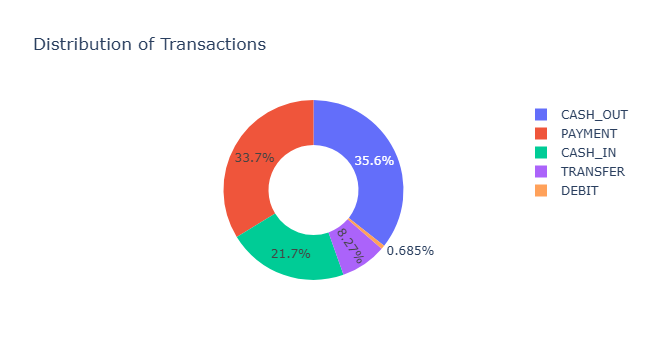

In [41]:
type = data["type"].value_counts()
transactions = type.index
quantity = type.values
figure = px.pie(data, values = quantity, names = transactions, hole= 0.5, title ="Distribution of Transactions")
figure.show()

In [42]:
#check correlation b/w features and isFraud column

#make sure to select only numeric column before calculationg correlation
numeric_data = data.select_dtypes(include=[float, int])

# Calculate the correlation matrix
correlation = numeric_data.corr()

print(correlation["isFraud"].sort_values(ascending = False))

isFraud           1.000000
amount            0.128862
step              0.045030
oldbalanceOrg     0.003829
newbalanceDest   -0.000495
oldbalanceDest   -0.007552
newbalanceOrig   -0.009438
Name: isFraud, dtype: float64


In [43]:
data["tyep"] = data["type"].map({"CASH_OUT":1, "PAYMENT":2, "CASH_IN":3, "TRANSFER":4, "DEBIT":5})
data["isFraud"] = data["isFraud"].map({"Legit":0, "Fraud":1})
print (data.head())

   step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  tyep  
0  M1979787155             0.0             0.0      NaN     2  
1  M2044282225             0.0             0.0      NaN     2  
2   C553264065             0.0             0.0      NaN     4  
3    C38997010         21182.0             0.0      NaN     1  
4  M1230701703             0.0             0.0      NaN     2  


In [45]:
from sklearn.preprocessing import StandardScaler

In [49]:
scaler = StandardScaler()

In [51]:
scaler.fit(numeric_data.drop('isFraud', axis =1))

StandardScaler()

In [53]:
scaled_features = scaler.transform(numeric_data.drop('isFraud', axis=1))

In [55]:
numeric_data_feat = pd.DataFrame(scaled_features, columns = numeric_data.columns[:-1])
numeric_data_feat.head()

step    amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
0 -1.662022 -0.561738      -0.236855       -0.243832       -0.425883   
1 -1.662022 -0.591840      -0.286956       -0.290673       -0.425883   
2 -1.662022 -0.598194      -0.294045       -0.297117       -0.425883   
3 -1.662022 -0.598194      -0.294045       -0.297117       -0.416661   
4 -1.662022 -0.554837      -0.280123       -0.287183       -0.425883   

   newbalanceDest  
0       -0.461062  
1       -0.461062  
2       -0.461062  
3       -0.461062  
4       -0.461062

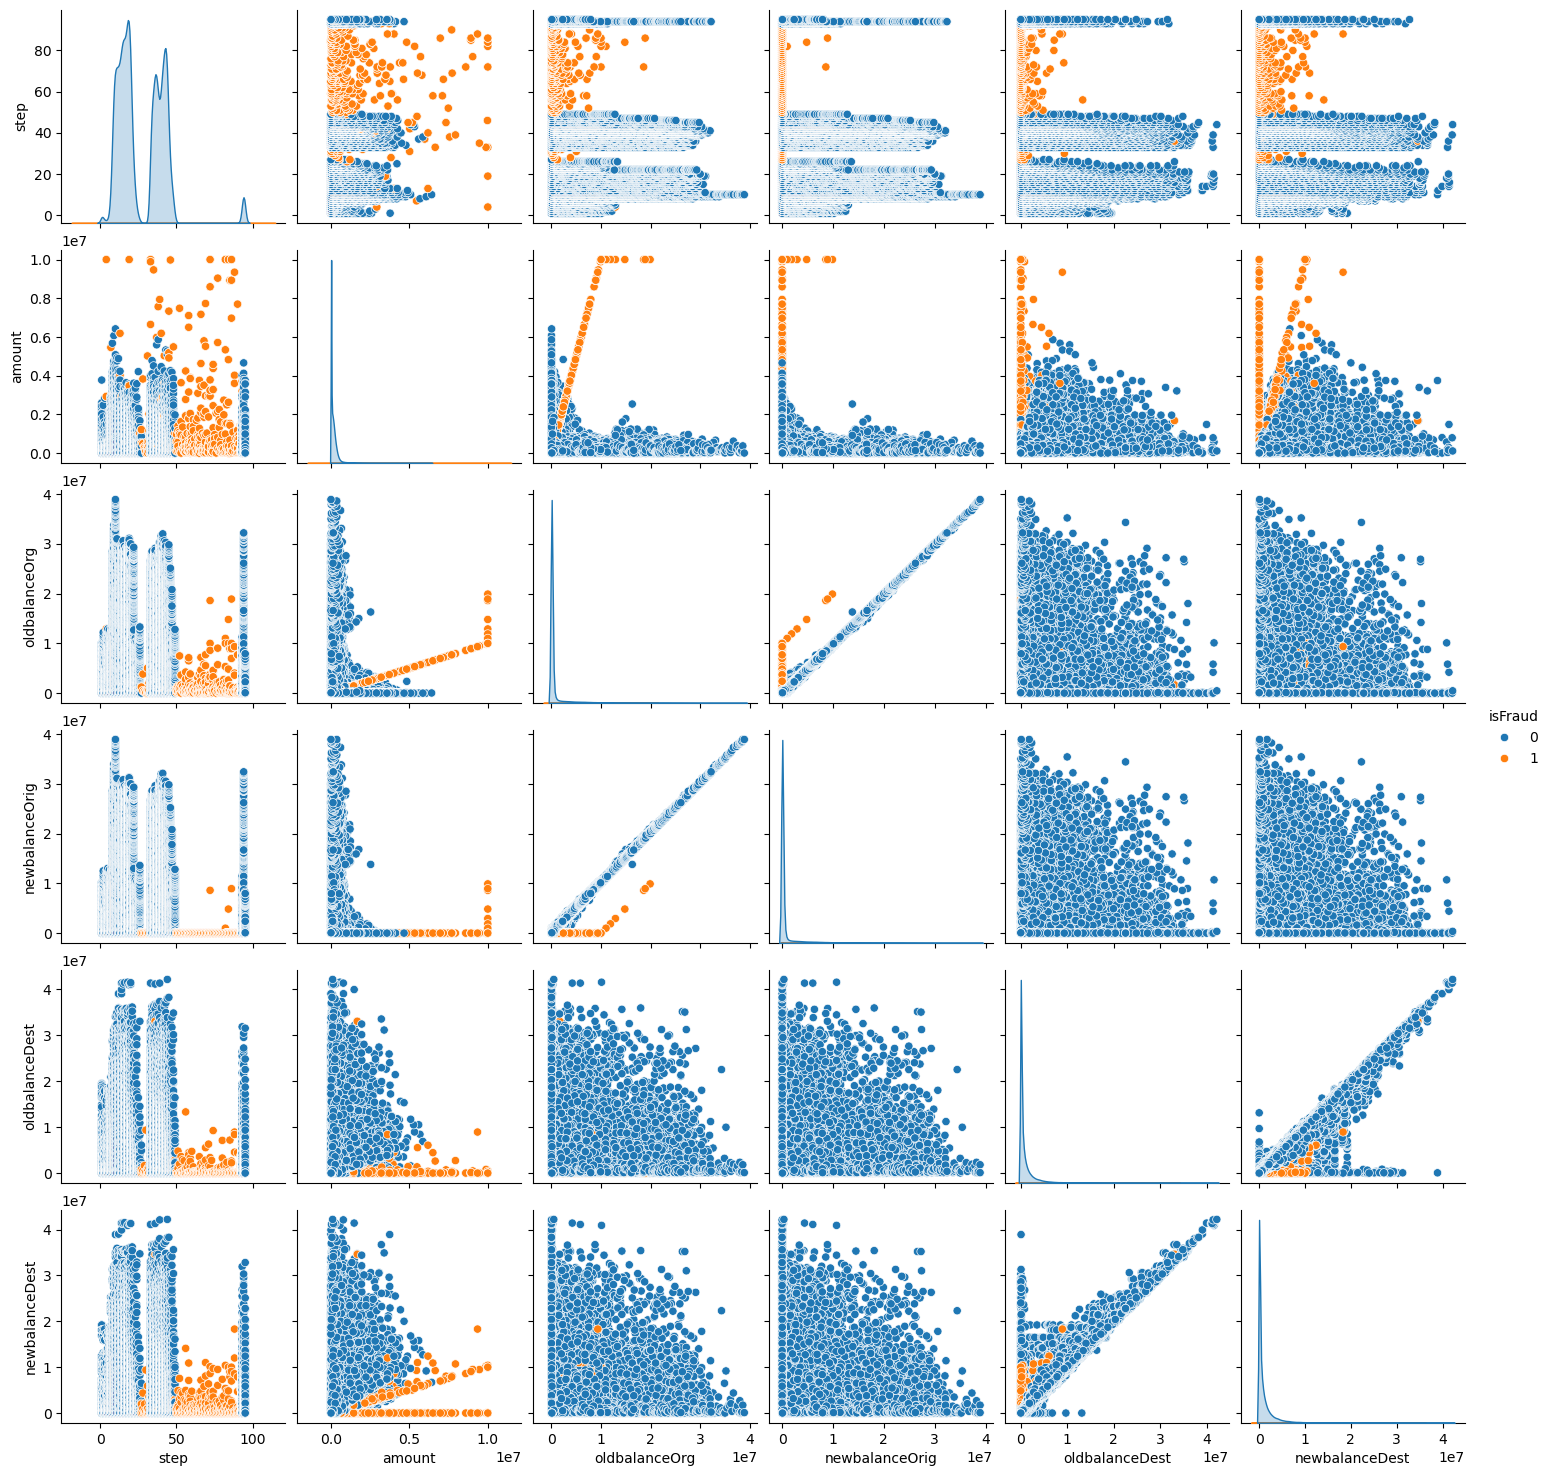

In [17]:
sns.pairplot(numeric_data, hue='isFraud')

In [57]:
from sklearn.model_selection import train_test_split

In [59]:
X = numeric_data.drop(['isFraud'], axis=1)
y = numeric_data['isFraud']

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=100, random_state=42)

In [63]:
# Drop rows with NaN values
X_train = X_train.dropna()
y_train = y_train.loc[X_train.index]  

In [65]:
from sklearn.tree import DecisionTreeClassifier

In [67]:
model = DecisionTreeClassifier()

In [69]:
model.fit(X_train, y_train)
print(model.score(X_test,y_test))

0.9995899216082702


In [89]:
#for prediction
features = [[4, 9000.60, 9000.60, 0.0, 0.0, 0.0]]

In [99]:
import warnings
from sklearn.exceptions import DataConversionWarning

warnings.filterwarnings("ignore", category=UserWarning, module='sklearn')

In [109]:
prediction = model.predict(features)
prediction_label = ['Fraud' if pred == 1 else 'Legit' for pred in prediction]

In [111]:
print(prediction_label)

['Legit']
